<a href="https://colab.research.google.com/github/gabrielalins-stack/programacao-estatistica/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1

Ache **intervalos de confiança** para os exemplos do laboratório anterior.

O objetivo é estimar uma quantidade de interesse

$$
I = \mathbb{E}[h(X)],
$$

usando o estimador de Monte Carlo

$$
\hat{I}_n = \frac{1}{n}\sum_{i=1}^n h(X_i),
$$

onde $X_1, \ldots, X_n$ são amostras independentes de $X$.

Pelo Teorema Central do Limite, para $n$ grande,

$$
\hat{I}_n \approx \mathcal{N}\left(I, \frac{\sigma^2}{n}\right),
$$

onde $\sigma^2 = \mathrm{Var}(h(X))$. Como $\sigma^2$ é desconhecido, usamos o desvio padrão amostral

$$
s_n^2 = \frac{1}{n-1}\sum_{i=1}^n (h(X_i) - \hat{I}_n)^2.
$$

Um intervalo de confiança de 95% para $I$ é dado por

$$
\hat{I}_n \pm 1.96\,\frac{s_n}{\sqrt{n}}.
$$


Exemplo 9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def exponencial(lam):
  u = np.random.uniform(low= 0, high= 1)
  x = (-1)*np.log(u)/(lam)
  return x

cont = 0

for i in range(1000):
  amostra = []
  n = 1000
  soma = 0
  for j in range(n):
    x = exponencial(1)
    amostra.append(x)

  f_x = []
  for i in range(n):
   fx = (np.sin(amostra[i]))/(amostra[i]*np.exp(-amostra[i]))
   f_x.append(fx)

  soma = np.sum(f_x)

  mi = soma/n
  var = (f_x - mi)**2
  amostra_var = np.sum(var)/(n-1)
  dp = np.sqrt(amostra_var)

  lim_inf = mi - 1.96 * dp/np.sqrt(n)
  lim_sup = mi + 1.96 * dp/np.sqrt(n)

  if lim_inf < np.pi/2 < lim_sup:
    cont += 1
print(cont)

936


# Exercício 2

Sejam $X_1, \ldots, X_n$ variáveis independentes $X_i \sim \mathcal{N}(0, \sigma^2)$.  
O objetivo é verificar, por meio de simulações de Monte Carlo, o comportamento de  
$\mathbb{E}\left[\max_{1 \leq i \leq n} X_i\right]$ em relação ao limite teórico $\sqrt{2\sigma^2 \log(n)}$.

- Para $n = 1, 2, \ldots, 1000$, estime $\mathbb{E}\left[\max_{1 \leq i \leq n} X_i\right]$ com amostras de tamanho $M = 1000$.

- Plote, em um único gráfico:
  - A curva estimada de $\mathbb{E}\left[\max_{1 \leq i \leq n} X_i\right]$ para $n = 1, 2, \ldots, 1000$;
  - A curva teórica $\sqrt{2\sigma^2 \log(n)}$, para comparação.


In [ ]:
def normal():
  x = exponencial(1)
  u = np.random.uniform()
  while u > np.exp(-((x-1)**2)/2):
    x = exponencial(1)
    u = np.random.uniform()
  if u < np.exp(-((x-1)**2)/2):
    return x

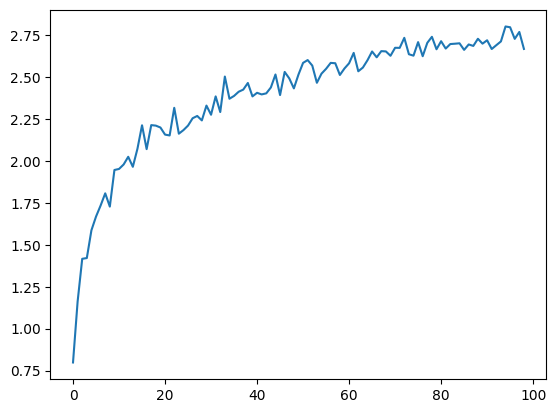

In [ ]:
M = 100
esperanca_max = []

for n in range(1, 100):
  media_max = []
  for i in range(M):
    x_i = []
    for j in range(n):
      xi = normal()
      x_i.append(xi)

    media_max.append(np.max(x_i))
  esperanca_max.append(np.mean(media_max))

plt.plot(esperanca_max)

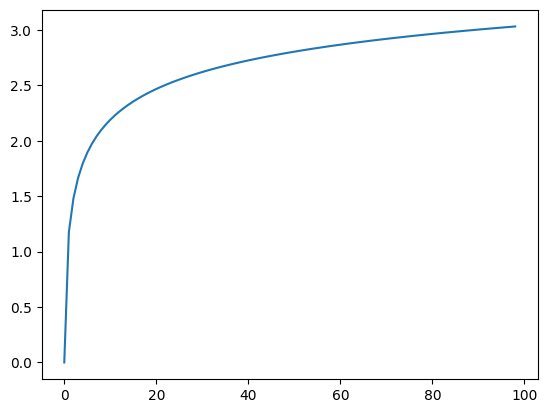

In [ ]:
plt.plot(np.sqrt(2*np.log(np.arange(1, 100))))